# Importing Libraries

In [1]:
import re
import tweepy as tw
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Authenticate to Twitter

In [2]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [5]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Get Tweets

In [7]:
hashtag = "#Windows11"
query = tw.Cursor(api.search_tweets, q=hashtag).items(2000)
tweets = [{'Tweet':tweet.text} for tweet in query]

# Preprocessing Tweets

In [8]:
df = pd.DataFrame.from_dict(tweets)
df

,Tweet
0,RT @AccessITAutomat: #Microsoft shares fix for...
1,#Microsoft shares fix for broken #Outlook sear...
2,📣#StarWind_handy\nTop Features in #Windows11 🪟...
3,Windows11にしてからWin+Xのメニューにショートカットキーが表示されず機能もせず、...
4,This shit is comically pathetic.\n\n#Microsoft...
...,...
1995,RT @ASUSJapan: プロの高度なパフォーマンスを\nさらに究めたい人へ。\n「Pr...
1996,RT @Shawn_Brink_MVP: KB5008918 Cumulative Upda...
1997,明日（12/5）までの特価商品に時間があるので、\n#富士通 U939/B に噂の #Win...
1998,RT @MicrosoftMEA: Always have something to pla...


In [9]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#Windows11']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harrisunrajmohan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harrisunrajmohan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
def preprocess_tweets(tweet):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    processed_tweet = re.sub("[h]+[t]+[t]+[p]+[s]+[a-zA-Z0-9:_.\/\/]+","",processed_tweet)
    processed_tweet = re.sub("[@]+[a-zA-Z0-9:_.]+","",processed_tweet)
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x))
df.head()

,Tweet,Processed Tweet
0,RT @AccessITAutomat: #Microsoft shares fix for...,#Microsoft share fix broken #Outlook search
1,#Microsoft shares fix for broken #Outlook sear...,#Microsoft share fix broken #Outlook search
2,📣#StarWind_handy\nTop Features in #Windows11 🪟...,📣#StarWind_handy Top Features 🪟🖥️ Read article...
3,Windows11にしてからWin+Xのメニューにショートカットキーが表示されず機能もせず、...,Windows11にしてからWin+Xのメニューにショートカットキーが表示されず機能もせず、...
4,This shit is comically pathetic.\n\n#Microsoft...,This shit comically pathetic. #Microsoft #NotT...


In [12]:
df2 = df.drop_duplicates('Processed Tweet', keep='last')

# Calculate Polarity

In [13]:
df2['polarity'] = df2['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])

/var/folders/vw/181_kcnx2wdf7cfw178s0yhc0000gn/T/ipykernel_51078/2584331904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['polarity'] = df2['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])


In [14]:
df2.head()

,Tweet,Processed Tweet,polarity
2,📣#StarWind_handy\nTop Features in #Windows11 🪟...,📣#StarWind_handy Top Features 🪟🖥️ Read article...,0.378788
3,Windows11にしてからWin+Xのメニューにショートカットキーが表示されず機能もせず、...,Windows11にしてからWin+Xのメニューにショートカットキーが表示されず機能もせず、...,0.000000
4,This shit is comically pathetic.\n\n#Microsoft...,This shit comically pathetic. #Microsoft #NotT...,-0.600000
5,Alguém que já instalou o #Windows11 indica? Ou...,Alguém que já instalou indica? Ou melhor deixa...,0.000000
6,GREAT NEWS!!! THE SAVINGS CONTINUE!!! We are e...,GREAT NEWS!!! THE SAVINGS CONTINUE!!! We exten...,1.000000


In [15]:
def sentiment_tweets(pol):
    sent = ""
    if pol > 0.1:
        sent = "Positive"
    elif pol < -0.1:
        sent = "Negative"
    else:
        sent = "Neutral"
    return(sent)

df2['sentiment'] = df2['polarity'].apply(lambda x: sentiment_tweets(x))
df2.head()

/var/folders/vw/181_kcnx2wdf7cfw178s0yhc0000gn/T/ipykernel_51078/1344299464.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentiment'] = df2['polarity'].apply(lambda x: sentiment_tweets(x))


,Tweet,Processed Tweet,polarity,sentiment
2,📣#StarWind_handy\nTop Features in #Windows11 🪟...,📣#StarWind_handy Top Features 🪟🖥️ Read article...,0.378788,Positive
3,Windows11にしてからWin+Xのメニューにショートカットキーが表示されず機能もせず、...,Windows11にしてからWin+Xのメニューにショートカットキーが表示されず機能もせず、...,0.000000,Neutral
4,This shit is comically pathetic.\n\n#Microsoft...,This shit comically pathetic. #Microsoft #NotT...,-0.600000,Negative
5,Alguém que já instalou o #Windows11 indica? Ou...,Alguém que já instalou indica? Ou melhor deixa...,0.000000,Neutral
6,GREAT NEWS!!! THE SAVINGS CONTINUE!!! We are e...,GREAT NEWS!!! THE SAVINGS CONTINUE!!! We exten...,1.000000,Positive


In [16]:
pos = df2['sentiment'].value_counts()['Positive']
neg = df2['sentiment'].value_counts()['Negative']
neut = df2['sentiment'].value_counts()['Neutral']
print('Positive \t:',pos,'\nNegative \t:',neg,'\nNeutral \t:',neut)

Positive 	: 279 
Negative 	: 96 
Neutral 	: 908


# Visualize

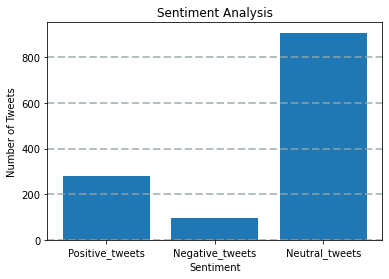

In [17]:
data = [pos, neg, neut]
labels = ['Positive_tweets','Negative_tweets','Neutral_tweets']
plt.xticks(range(len(data)), labels)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Analysis')
plt.bar(range(len(data)), data)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()
plt.show()

In [18]:
df2.to_csv('/Users/harrisunrajmohan/Documents/Data_Driven_Product_Management/DDPM/Resources_from_Faculty/Exam_03/Codes/sentiment_analysis_output.csv')